## Classificador de Spam - Naive Bayes

## Link de dataset de Spam: http://www.dt.fee.unicamp.br/~tiago//youtubespamcollection/

## Importa todos os pacotes de Processamento de Linguagem Natural

In [1]:
#import nltk
#nltk.download('all')
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

## Ler arquivo de dados  - SMS de celular

In [2]:
!ls *.csv

Youtube 01-comments-Psy.csv     spam.csv
Youtube 09-comments Shakira.csv


In [3]:
!head 'Youtube 09-comments Shakira.csv'

COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach one billion!! Share it and replay it! ﻿",0
z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0
z12myn4rltf4ejddv23mwr3piuapcbl0r,jehoiada wellington,2015-05-28T17:06:37.288000,The best world cup song ever!!!!﻿,0
z135vzqy1yrjhluew23kibopnrmqsplux,Kara Cuthbertson,2015-05-28T15:46:42.482000,I love﻿,0
z12uujnj2sifvzvav04chpypvofvexpoggg,Sudheer Yadav,2015-05-28T10:28:25.133000,SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakira GuruOfMovie﻿,1
z13lvh1qnma4d15sy23lyvqq5riafz52m,Alex John,2015-05

In [6]:
# Dados coletados e Classificados de SMS de celular
dataset = pd.read_csv('Youtube 09-comments Shakira.csv', encoding='utf-8') # encoding='latin-1')
dataset.head(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0
5,z12myn4rltf4ejddv23mwr3piuapcbl0r,jehoiada wellington,2015-05-28T17:06:37.288000,The best world cup song ever!!!!﻿,0
6,z135vzqy1yrjhluew23kibopnrmqsplux,Kara Cuthbertson,2015-05-28T15:46:42.482000,I love﻿,0
7,z12uujnj2sifvzvav04chpypvofvexpoggg,Sudheer Yadav,2015-05-28T10:28:25.133000,SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakir...,1
8,z13lvh1qnma4d15sy23lyvqq5riafz52m,Alex John,2015-05-28T07:44:52.614000,Awesome ﻿,0
9,z135hlk5grfwjhmym04ced0gyzrvsn5avuw0k,Nirab Valobasha,2015-05-27T21:31:38.388000,I like shakira..﻿,0


In [7]:
# classe = 1 - SPAM
# classe = 0 - NÃO SPAM - HAM
dataset = dataset.loc[:, ['CONTENT', 'CLASS']]  
dataset.columns = [ 'texto', 'classe']
dataset.head()

,texto,classe
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0


In [8]:
# número de tuplas
print("Número de linhas: ",len(dataset))

Número de linhas:  370


In [9]:
# número de atributos
print("Número de atributos: ",len(dataset.columns))

Número de atributos:  2


In [10]:
# atributos
dataset.columns

Index(['texto', 'classe'], dtype='object')

In [11]:
# dataset
dataset.head(8)

,texto,classe
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0
5,The best world cup song ever!!!!﻿,0
6,I love﻿,0
7,SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakir...,1


## Limpando o dataset

In [12]:
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

#dataset2 = dataset.loc[:, ['v1', 'v2']]
dataset.columns = [ 'texto', 'classe']
dataset2 = dataset.copy()
dataset2.head(10)

,texto,classe
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach one billion!! Share it and replay it! ﻿",0
4,shakira is best for worldcup﻿,0
5,The best world cup song ever!!!!﻿,0
6,I love﻿,0
7,SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakira GuruOfMovie﻿,1
8,Awesome ﻿,0
9,I like shakira..﻿,0


In [13]:
dataset2.classe.value_counts()

0    196
1    174
Name: classe, dtype: int64

In [14]:
ham = dataset2.classe.value_counts()[0]
spam = dataset2.classe.value_counts()[1]
ham, spam

(196, 174)

In [15]:
print('ham =', round(ham/ (ham+spam) * 100), '%')
print('spam =', round(spam/ (ham+spam) * 100), '%')

ham = 53.0 %
spam = 47.0 %


In [16]:
dataset2.tail()

,texto,classe
365,I love this song because we sing it at Camp all the time!!,0
366,I love this song for two reasons: 1.it is about Africa 2.i was born in beautiful south Africa,0
367,wow,0
368,Shakira u are so wiredo,0
369,Shakira is the best dancer,0


## Pre-Processamento 

### Separando SMS e suas classes

In [17]:
texto = dataset2['texto'].values
classes = dataset2['classe'].values

In [18]:
print(texto[:10])

['Nice song\ufeff' 'I love song \ufeff' 'I love song \ufeff'
 '860,000,000 lets make it first female to reach one billion!! Share it and replay it! \ufeff'
 'shakira is best for worldcup\ufeff'
 'The best world cup song ever!!!!\ufeff' 'I love\ufeff'
 'SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakira GuruOfMovie\ufeff'
 'Awesome \ufeff' 'I like shakira..\ufeff']


In [19]:
print(classes[:10])

[0 0 0 0 0 0 0 1 0 0]


In [20]:
print(texto[classes == 0][:10]) # HAM

['Nice song\ufeff' 'I love song \ufeff' 'I love song \ufeff'
 '860,000,000 lets make it first female to reach one billion!! Share it and replay it! \ufeff'
 'shakira is best for worldcup\ufeff'
 'The best world cup song ever!!!!\ufeff' 'I love\ufeff' 'Awesome \ufeff'
 'I like shakira..\ufeff'
 'Shakira - Waka Waka <br />LOVE THIS SONG!!!!!!!!!!!!!!!\ufeff']


In [21]:
print(texto[classes == 1][:10]) # SPAM

['SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakira GuruOfMovie\ufeff'
 'Check out this playlist on YouTube:\ufeff'
 'Support the fight for your 4th amendment right to privacy in your home.\xa0 Stop the NSA spying on Americans with the un Patriot Act Renewal. Rand Paul has spent 10.5 hours on the Senate floor in a Protest and Filibuster fighting for our\xa0 Constitution that this Nation is founded on. Join the fight at Rand Paul dot com. Spread The Word. We Have Someone That Cares About Our Nation.\xa0 Email your Senators, Congress men and women, tell them to support Rand. Tell the news to support Rand too Senator Rand Paul was up until <a href="http://www.youtube.com/watch?v=pRpeEdMmmQ0&amp;t=1m00s">1:00</a> am this passed Saturday morning fighting for our Constitution buy postponing the vote until this week. Our Constitution Matters join Rand in the fight to protect <a href="http://it.ht">it.ht</a> to privacy in your home and business.. Senator Rand Paul was up until <a href="http://ww

# Gerando o modelo

In [22]:
vectorizer = CountVectorizer(analyzer="word")
freq_texto = vectorizer.fit_transform(texto)
freq_texto.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
(freq_texto.toarray()).shape

(370, 1357)

In [24]:
print(vectorizer.get_feature_names()[:100])

['00', '000', '0687119038', '08', '10', '100', '101721377578919894134', '108k', '128gb', '13', '14', '14gkvdo', '15', '16gb', '17', '18', '19', '1billiom', '1bsefqe', '1hmvtx', '1m00s', '20', '200', '2004', '200mm', '2010', '2013', '2015', '23', '25', '250', '320', '32gb', '33', '333', '35', '360', '385', '387', '39', '390', '3d', '40', '4000', '421', '433', '4500', '4g', '4gb', '4netjobs', '4th', '50', '500', '5000', '50k', '510', '515', '55', '550', '55mm', '5tu9gn1l310', '60', '600', '682', '753', '7in', '860', '868', '9nl', 'abominable', 'abomination', 'about', 'absolutely', 'absorbing', 'account', 'acidic', 'acquire', 'acquiring', 'act', 'actually', 'adam', 'addition', 'adele', 'adf', 'admirable', 'adore', 'adroid', 'advertise', 'advertisements', 'advertisiments', 'affiliated', 'afflicted', 'africa', 'african', 'africans', 'after', 'again', 'against', 'ago', 'agree']


## aplicando o Naive Bayes

In [25]:
modelo = MultinomialNB()
modelo.fit(freq_texto,classes)

MultinomialNB()

### Testando o modelo com algumas instâncias simples

In [26]:
testes = ["Yes i have. So that's why u texted. Pshew...missing you so much",
          'Free entry Katty Perry Show, click here...',
          'Winner!!! are you wish to win a lottery',
          'Have a safe trip to  Russia! enjoy...',
          'Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min',
          'Temporal Convolutional Nets Take Over from RNNs for NLP Predictions',
          'U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute'
         ]

In [27]:
freq_testes = vectorizer.transform(testes)

In [28]:
freq_testes.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [29]:
freq_testes.shape

(7, 1357)

In [30]:
# Fazendo a classificação com o modelo treinado.
modelo.predict(freq_testes)

array([0, 1, 1, 1, 1, 1, 1])

In [31]:
tweets = testes
classificacao = modelo.predict(freq_testes)

print ("Novas Instancias Classificadas...")
for i in range(len(testes)):
    print (classificacao[i], " -> ", tweets[i] )

Novas Instancias Classificadas...
0  ->  Yes i have. So that's why u texted. Pshew...missing you so much
1  ->  Free entry Katty Perry Show, click here...
1  ->  Winner!!! are you wish to win a lottery
1  ->  Have a safe trip to  Russia! enjoy...
1  ->  Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min
1  ->  Temporal Convolutional Nets Take Over from RNNs for NLP Predictions
1  ->  U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute


## Avaliando o modelo 

In [32]:
# Fazendo o cross validation do modelo
import numpy as np
resultados = cross_val_predict(modelo, freq_texto, classes, cv=10)

In [33]:
resultados[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
# Medindo a acurácia média do modelo
metrics.accuracy_score(classes,resultados)

0.9081081081081082

In [35]:
freq_texto.count_nonzero()

5307

### Matriz de Confusão

In [36]:
# Matriz de confusão
print (pd.crosstab(classes, resultados, rownames=['REAL'], colnames=['PREDITO'], margins=True))

PREDITO    0    1  All
REAL                  
0        191    5  196
1         29  145  174
All      220  150  370


In [37]:
# Medidas de validação do modelo
classe=[0,1] #['ham','spam']
print (metrics.classification_report(classes,resultados,classe))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       196
           1       0.97      0.83      0.90       174

    accuracy                           0.91       370
   macro avg       0.92      0.90      0.91       370
weighted avg       0.91      0.91      0.91       370



/Users/uepb/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Visualizando os Spam's

In [38]:
text_spam = texto[classes == 1 ] # 'spam']
spam = ""
for i in range(len(text_spam)):
    spam = spam + ' ' + text_spam[i]
spam[:500]

' SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakira GuruOfMovie\ufeff Check out this playlist on YouTube:\ufeff Support the fight for your 4th amendment right to privacy in your home.\xa0 Stop the NSA spying on Americans with the un Patriot Act Renewal. Rand Paul has spent 10.5 hours on the Senate floor in a Protest and Filibuster fighting for our\xa0 Constitution that this Nation is founded on. Join the fight at Rand Paul dot com. Spread The Word. We Have Someone That Cares About Our Nation.\xa0 Email your Senators,'

In [ ]:
#!pip install wordcloud

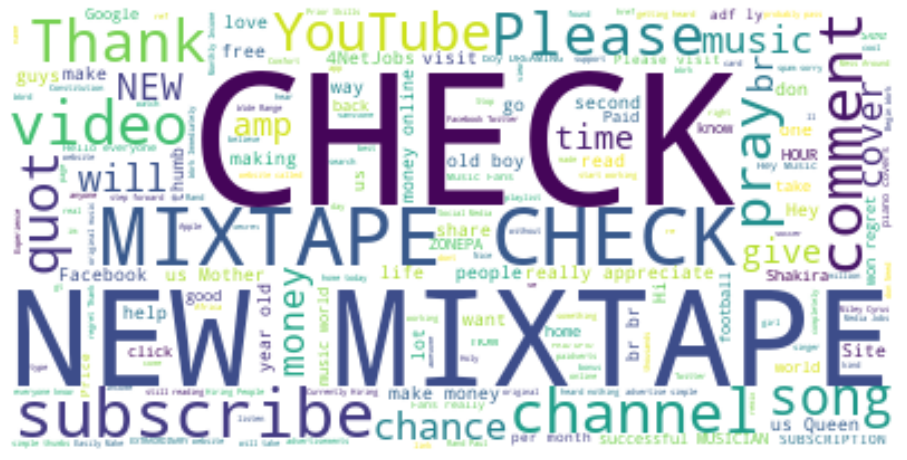

In [41]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_words=200)
# generate word cloud
#wc.generate_from_frequencies(spam)
wc.generate_from_text(spam)
# show
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
text_ham = texto[classes == 0] #'ham']
ham = ""
for i in range(len(text_spam)):
    ham = ham + ' ' + text_ham[i]
ham[:500]

' Nice song\ufeff I love song \ufeff I love song \ufeff 860,000,000 lets make it first female to reach one billion!! Share it and replay it! \ufeff shakira is best for worldcup\ufeff The best world cup song ever!!!!\ufeff I love\ufeff Awesome \ufeff I like shakira..\ufeff Shakira - Waka Waka <br />LOVE THIS SONG!!!!!!!!!!!!!!!\ufeff Why so many disliked??????!!!!!!😯\ufeff I don&#39;t think this song will ever get old \ufeff Love song\ufeff wery good\ufeff Every time I hear this song, I think about Iniesta&#39;s goal against the Netherlands...\ufeff Whose watching this i'

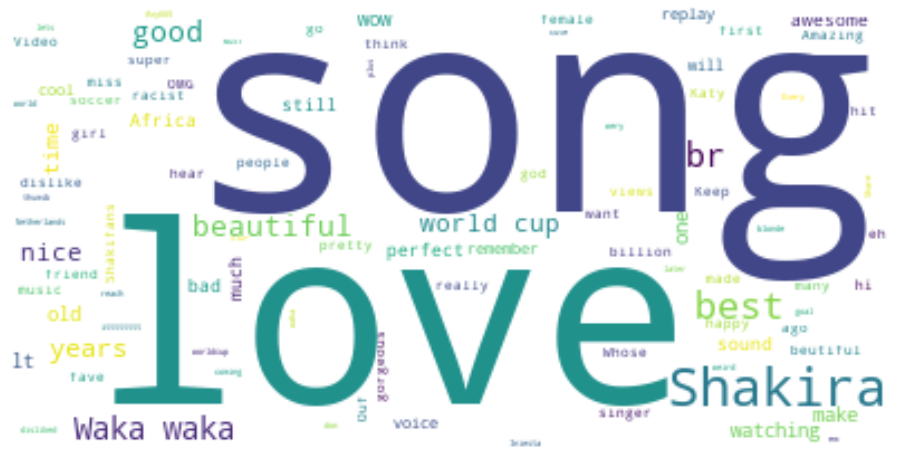

In [43]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_words=200)
# generate word cloud
#wc.generate_from_frequencies(spam)
wc.generate_from_text(ham)
# show
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

---